In [1]:
#required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1 EDA

## 1.1 Exploration of the provided tables

In [2]:
#reading the dataset
df = pd.read_csv("data.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
#dataset size
df.shape

(350, 11)

In [4]:
#type des colonnes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


#### we notice that there are two missing data on the “Satisfaction level” column

In [5]:
#calculation of missing data by columns
df.isnull().sum().sort_values(ascending=False)

Satisfaction Level          2
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
dtype: int64

In [6]:
#showing with missing values
df_miss=df[df.isnull().any(axis=1)]
df_miss.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


#### this data will be dropped later 


In [7]:
#all possible data by columns
for colonne in df.columns:
    valeurs_uniques = df[colonne].unique()
    print(f"Colonnes '{colonne}': {valeurs_uniques}")

Colonnes 'Customer ID': [101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334
 335 336 337 338 339 340 34

#### This code allows us to display all possible values for each column

## 1.2 data cleaning, validation and preprocessing

In [8]:
#Droping rows with missing values
df.dropna(inplace=True)  

In [9]:
df.shape

(348, 11)

#### both lines have been deleted

In [10]:
#check if there are duplicate rows
duplicated_rows = df.duplicated()

if duplicated_rows.any():
    print("There are duplicated rows.")
else:
    print("There are no duplicated rows.")

There are no duplicated rows.


In [11]:
#check if data is negative on specific columns
print("Column 'Age' has negative values:", (df['Age'] < 0).any())
print("Column 'Total Spend' has negative values:", (df['Total Spend'] < 0).any())
print("Column 'Items Purchased' has negative values:", (df['Items Purchased'] < 0).any())
print("Column 'Average Rating' has negative values:", (df['Average Rating'] < 0).any())
print("Column 'Days Since Last Purchase' has negative values:", (df['Days Since Last Purchase'] < 0).any())

Column 'Age' has negative values: False
Column 'Total Spend' has negative values: False
Column 'Items Purchased' has negative values: False
Column 'Average Rating' has negative values: False
Column 'Days Since Last Purchase' has negative values: False


## 1.3 Descriptive analysis with visualizations and insights

In [12]:
#apply statistical calculations on our dataset
summary_stats = df.describe()
summary_stats

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


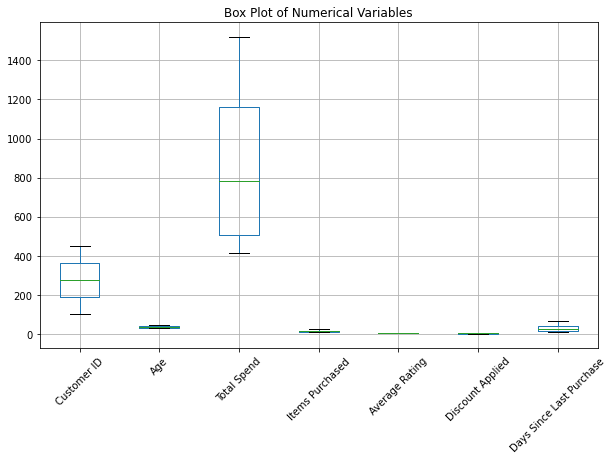

In [13]:
#display the boxplot for these columns
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

#### it is easy to see that there are no aberrant vlauer or outliers

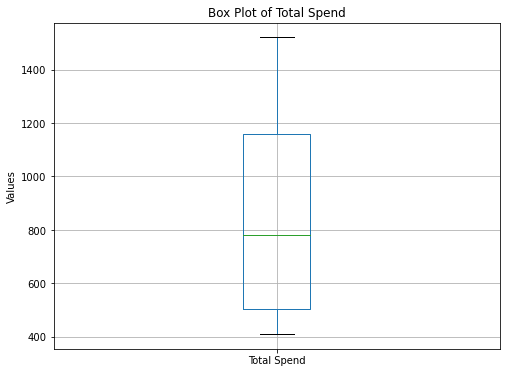

In [14]:
#for greater visibility we redisplay the box plot of "Total Spend"
#we can do the same for the others columns
plt.figure(figsize=(8, 6))
df['Total Spend'].plot(kind='box')
plt.title(f'Box Plot of Total Spend')
plt.ylabel('Values')
plt.grid(True)
plt.show()

### graphs of the “Total spend” column by gender, city,  membership category and age

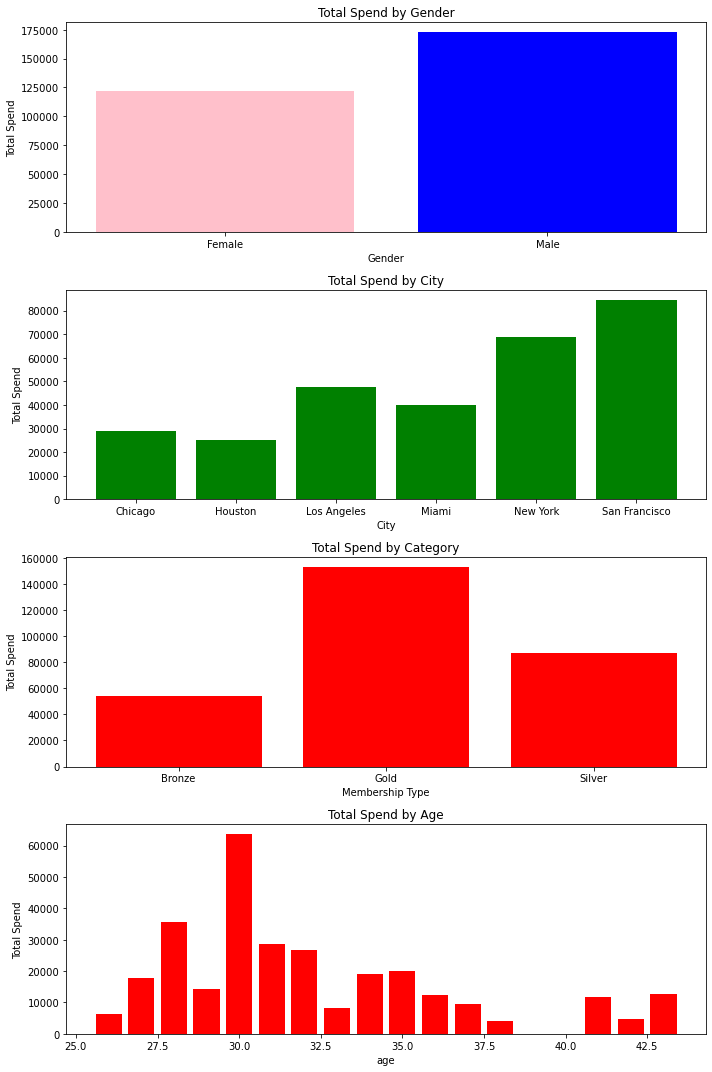

In [15]:
spending_by_gender = df.groupby('Gender')['Total Spend'].sum()
spending_by_city = df.groupby('City')['Total Spend'].sum()
spending_by_category = df.groupby('Membership Type')['Total Spend'].sum()
spending_by_age= df.groupby('Age')['Total Spend'].sum()


# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 15))  # 3 rows, 1 column

# Plot total spend by gender
axes[0].bar(spending_by_gender.index, spending_by_gender.values, color=['pink', 'blue'])
axes[0].set_title('Total Spend by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Total Spend')

# Plot total spend by city
axes[1].bar(spending_by_city.index, spending_by_city.values, color='green')
axes[1].set_title('Total Spend by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Total Spend')

# Plot total spend by category
axes[2].bar(spending_by_category.index, spending_by_category.values, color='red')
axes[2].set_title('Total Spend by Category')
axes[2].set_xlabel('Membership Type')
axes[2].set_ylabel('Total Spend')

# Plot total spend by age
axes[3].bar(spending_by_age.index, spending_by_age.values, color='red')
axes[3].set_title('Total Spend by Age')
axes[3].set_xlabel('age')
axes[3].set_ylabel('Total Spend')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### graphs of the “Items Purchased” column by gender, city,  membership category and age

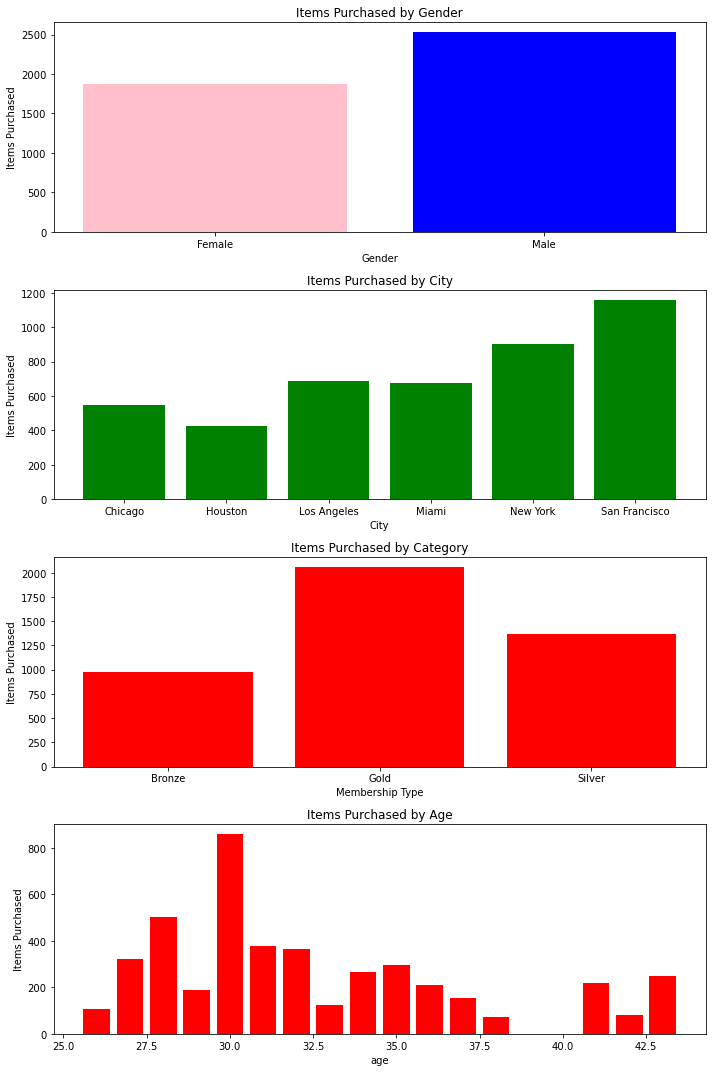

In [18]:
Purchased_by_gender = df.groupby('Gender')['Items Purchased'].sum()
Purchased_by_city = df.groupby('City')['Items Purchased'].sum()
Purchased_by_category = df.groupby('Membership Type')['Items Purchased'].sum()
Purchased_by_age= df.groupby('Age')['Items Purchased'].sum()


# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 15))  # 3 rows, 1 column

# Plot total spend by gender
axes[0].bar(Purchased_by_gender.index, Purchased_by_gender.values, color=['pink', 'blue'])
axes[0].set_title('Items Purchased by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Items Purchased')

# Plot total spend by city
axes[1].bar(Purchased_by_city.index, Purchased_by_city.values, color='green')
axes[1].set_title('Items Purchased by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Items Purchased')

# Plot total spend by category
axes[2].bar(Purchased_by_category.index, Purchased_by_category.values, color='red')
axes[2].set_title('Items Purchased by Category')
axes[2].set_xlabel('Membership Type')
axes[2].set_ylabel('Items Purchased')

# Plot total spend by age
axes[3].bar(Purchased_by_age.index, Purchased_by_age.values, color='red')
axes[3].set_title('Items Purchased by Age')
axes[3].set_xlabel('age')
axes[3].set_ylabel('Items Purchased')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### graphs of the “Average Rating” column by gender, city,  membership category and age

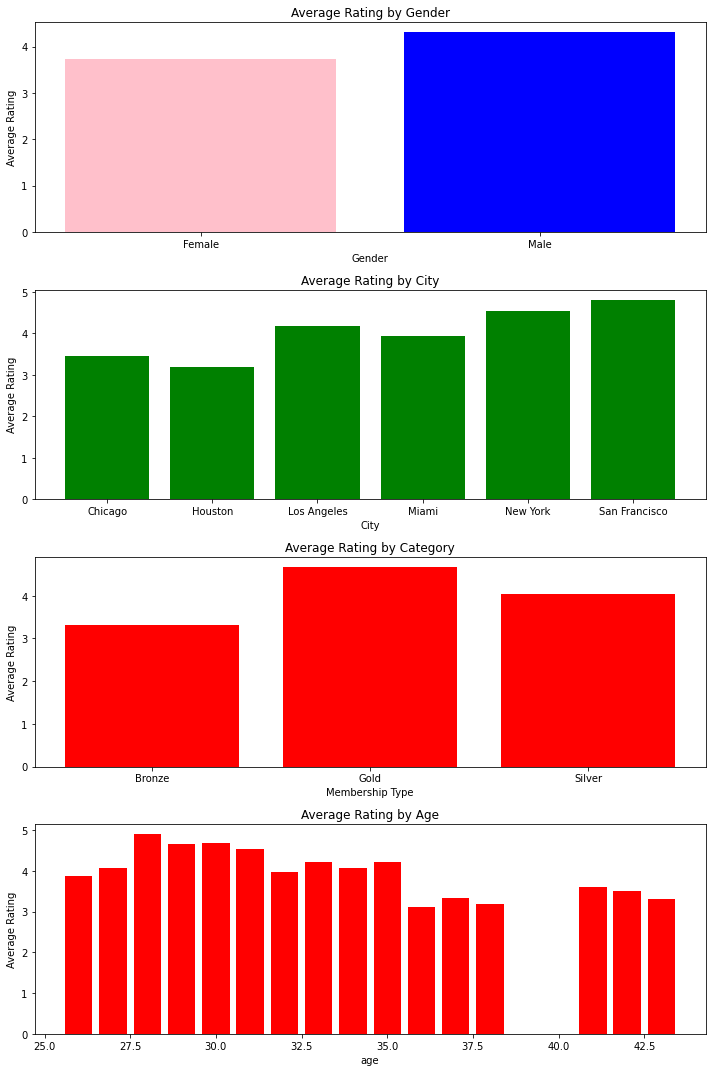

In [17]:
Rating_by_gender = df.groupby('Gender')['Average Rating'].mean()
Rating_by_city = df.groupby('City')['Average Rating'].mean()
Rating_by_category = df.groupby('Membership Type')['Average Rating'].mean()
Rating_by_age= df.groupby('Age')['Average Rating'].mean()


# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 15))  # 3 rows, 1 column

# Plot total spend by gender
axes[0].bar(Rating_by_gender.index, Rating_by_gender.values, color=['pink', 'blue'])
axes[0].set_title('Average Rating by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Rating')

# Plot total spend by city
axes[1].bar(Rating_by_city.index, Rating_by_city.values, color='green')
axes[1].set_title('Average Rating by City')
axes[1].set_xlabel('City')
axes[1].set_ylabel('Average Rating')

# Plot total spend by category
axes[2].bar(Rating_by_category.index, Rating_by_category.values, color='red')
axes[2].set_title('Average Rating by Category')
axes[2].set_xlabel('Membership Type')
axes[2].set_ylabel('Average Rating')

# Plot total spend by age
axes[3].bar(Rating_by_age.index, Rating_by_age.values, color='red')
axes[3].set_title('Average Rating by Age')
axes[3].set_xlabel('age')
axes[3].set_ylabel('Average Rating')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### bar plot of "discount applied" by gender, Age and membership type

<Figure size 720x360 with 0 Axes>

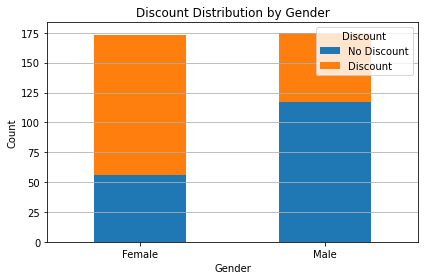

<Figure size 720x360 with 0 Axes>

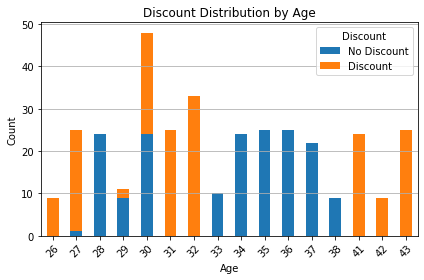

<Figure size 1440x720 with 0 Axes>

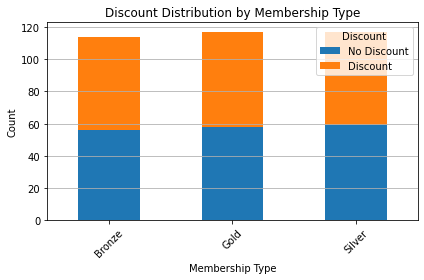

In [20]:
discount_by_gender = df.groupby(['Gender', 'Discount Applied']).size().unstack(fill_value=0)

discount_by_age = df.groupby(['Age', 'Discount Applied']).size().unstack(fill_value=0)

discount_by_type = df.groupby(['Membership Type', 'Discount Applied']).size().unstack(fill_value=0)


# Plot discount by gender
plt.figure(figsize=(10, 5))
discount_by_gender.plot(kind='bar', stacked=True)
plt.title('Discount Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Discount', labels=['No Discount', 'Discount'])
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot discount by age
plt.figure(figsize=(10, 5))
discount_by_age.plot(kind='bar', stacked=True)
plt.title('Discount Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Discount', labels=['No Discount', 'Discount'])
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot discount by Membership Type
plt.figure(figsize=(20, 10))
discount_by_type.plot(kind='bar', stacked=True)
plt.title('Discount Distribution by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Count')
plt.legend(title='Discount', labels=['No Discount', 'Discount'])
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### bar plot of "Satisfaction level" by gender, Age and membership type

<Figure size 720x360 with 0 Axes>

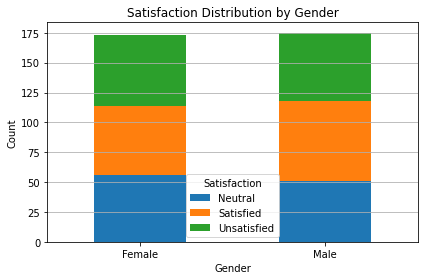

<Figure size 720x360 with 0 Axes>

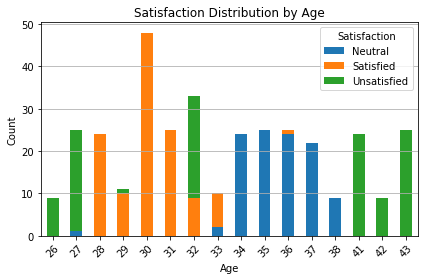

<Figure size 1440x720 with 0 Axes>

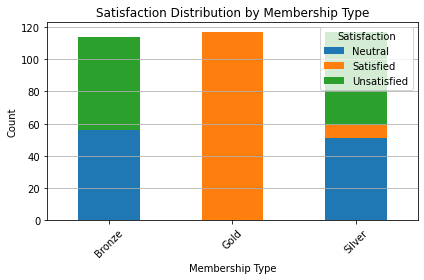

In [21]:
Satisfaction_by_gender = df.groupby(['Gender', 'Satisfaction Level']).size().unstack(fill_value=0)

Satisfaction_by_age = df.groupby(['Age', 'Satisfaction Level']).size().unstack(fill_value=0)

Satisfaction_by_type = df.groupby(['Membership Type', 'Satisfaction Level']).size().unstack(fill_value=0)


# Plot discount by gender
plt.figure(figsize=(10, 5))
Satisfaction_by_gender.plot(kind='bar', stacked=True)
plt.title('Satisfaction Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot discount by age
plt.figure(figsize=(10, 5))
Satisfaction_by_age.plot(kind='bar', stacked=True)
plt.title('Satisfaction Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot discount by Membership Type
plt.figure(figsize=(20, 10))
Satisfaction_by_type.plot(kind='bar', stacked=True)
plt.title('Satisfaction Distribution by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Matrix

#### To be able to create our correlation matrix, we first dummify our columns of qualitative type

In [22]:
df = pd.get_dummies(df, columns=['Gender'])
df = pd.get_dummies(df, columns=['Membership Type'])
df = pd.get_dummies(df, columns=['Discount Applied'])
df = pd.get_dummies(df, columns=['Satisfaction Level'])
df



,Customer ID,Age,City,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,101,29,New York,1120.20,14,4.6,25,1,0,0,1,0,0,1,0,1,0
1,102,34,Los Angeles,780.50,11,4.1,18,0,1,0,0,1,1,0,1,0,0
2,103,43,Chicago,510.75,9,3.4,42,1,0,1,0,0,0,1,0,0,1
3,104,30,San Francisco,1480.30,19,4.7,12,0,1,0,1,0,1,0,0,1,0
4,105,27,Miami,720.40,13,4.0,55,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,32,Miami,660.30,10,3.8,42,0,1,0,0,1,0,1,0,0,1
346,447,36,Houston,470.50,8,3.0,27,1,0,1,0,0,1,0,1,0,0
347,448,30,New York,1190.80,16,4.5,28,1,0,0,1,0,0,1,0,1,0
348,449,34,Los Angeles,780.20,11,4.2,21,0,1,0,0,1,1,0,1,0,0


In [23]:
corr_df = df.corr(method="pearson")

corr_df.style.background_gradient(cmap="coolwarm")

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Female,Gender_Male,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
Customer ID,1.000000,0.013900,-0.010860,-0.008469,-0.006173,0.116709,0.006328,-0.006328,0.011547,-0.009253,-0.002218,0.004567,-0.004567,0.039952,-0.038249,-0.000181
Age,0.013900,1.000000,-0.676826,-0.684397,-0.721752,0.170437,0.581774,-0.581774,0.834815,-0.533946,-0.295431,-0.061262,0.061262,0.270004,-0.531443,0.276567
Total Spend,-0.010860,-0.676826,1.000000,0.972276,0.941190,-0.544679,-0.387471,0.387471,-0.721940,0.913025,-0.195788,0.168530,-0.168530,-0.426867,0.896603,-0.494654
Items Purchased,-0.008469,-0.684397,0.972276,1.000000,0.921396,-0.425425,-0.439175,0.439175,-0.693687,0.856609,-0.167441,0.123037,-0.123037,-0.513878,0.847736,-0.359747
Average Rating,-0.006173,-0.721752,0.941190,0.921396,1.000000,-0.435921,-0.492687,0.492687,-0.841529,0.801935,0.034111,0.076756,-0.076756,-0.424490,0.806333,-0.405110
Days Since Last Purchase,0.116709,0.170437,-0.544679,-0.425425,-0.435921,1.000000,0.214256,-0.214256,0.267968,-0.458827,0.192605,-0.760032,0.760032,-0.362751,-0.496272,0.860161
Gender_Female,0.006328,0.581774,-0.387471,-0.439175,-0.492687,0.214256,1.000000,-1.000000,0.702005,-0.001993,-0.695439,-0.344872,0.344872,0.034966,-0.049604,0.016256
Gender_Male,-0.006328,-0.581774,0.387471,0.439175,0.492687,-0.214256,-1.000000,1.000000,-0.702005,0.001993,0.695439,0.344872,-0.344872,-0.034966,0.049604,-0.016256
Membership Type_Bronze,0.011547,0.834815,-0.721940,-0.693687,-0.841529,0.267968,0.702005,-0.702005,1.000000,-0.496743,-0.496743,-0.008234,0.008234,0.277950,-0.522573,0.259762
Membership Type_Gold,-0.009253,-0.533946,0.913025,0.856609,0.801935,-0.458827,-0.001993,0.001993,-0.496743,1.000000,-0.506494,-0.001993,0.001993,-0.474210,0.950571,-0.503236


#### From this table we can extract the following information:
#### - “Total Spend” and “items purchased” are strongly correlated with each other, which is logical : the greater the number of purchased items, the more the total amount tends to increase as well. when building the learning machine model in the next step we can delete the “items purchased” column from our study
#### - "Average Rating" and "total spend" are strongly correlated, meaning that people who buy more tend to give a good rating, or the opposite: people who are satisfied with their purchase tend to buy more
#### - "Average Rating" and "satifation level satified" are highly correlated, which was expected, people who give good ratings are satisfied with their experience on the app
#### - “Days Since Last Purchase” is strongly correlated with “discount applied true” and “Satisfaction elvel unsatified”
#### - people who are not satisfied tend not to return to the application to make their purchase. those who use a discount may be seen as one-time customers and therefore do not tend to return to the app on a regular basis

# 2 Metrics and KPI Recommendations

## 2.1 KPIs for understanding user engagement and app performance

#### Customer Retention Rate: This metric measures the percentage of customers who continue to engage with the app over a specific period, such as monthly or yearly. It helps assess the effectiveness of retention strategies and the app's ability to keep customers coming back.

#### Average Order Value (AOV): AOV is the average amount of money spent by customers per transaction. Monitoring AOV helps understand customer spending behavior and can indicate changes in purchasing trends or the effectiveness of pricing strategies.

#### Conversion Rate: Conversion rate measures the percentage of app users who complete a desired action, such as making a purchase or signing up for a membership. Tracking conversion rates can help identify areas for improvement in the user journey and app functionality.

#### Customer Lifetime Value (CLV): CLV is the predicted net profit attributed to the entire future relationship with a customer. It helps prioritize high-value customers and guides decisions related to marketing, customer acquisition, and retention efforts.

#### Engagement Metrics: These include metrics such as daily active users (DAU), monthly active users (MAU), session duration, and frequency of app usage. Tracking engagement metrics provides insights into how often and how long users interact with the app, indicating overall user satisfaction and app stickiness.

#### By monitoring these key metrics, stakeholders can gain a comprehensive understanding of user engagement and app performance, enabling data-driven decision-making and continuous improvement of the mobile app.

## 2.2 rationale and business value for each of the suggested metrics


#### Customer Retention Rate:

#### Rationale: Customer retention is crucial for sustainable business growth as acquiring new customers is typically more expensive than retaining existing ones. A high retention rate indicates that the app is successful in delivering value to customers, fostering loyalty, and reducing churn.
#### Business Value: By tracking retention rate, businesses can assess the effectiveness of their user engagement strategies, such as personalized recommendations, loyalty programs, and customer support initiatives. Improving retention can lead to increased customer lifetime value and revenue stability.

#### Average Order Value (AOV):

#### Rationale: AOV provides insights into customer spending behavior and the overall health of the e-commerce platform. Understanding changes in AOV can help identify opportunities to upsell, cross-sell, or optimize pricing strategies.
#### Business Value: Increasing AOV directly impacts revenue and profitability. By encouraging customers to spend more per transaction through tactics like bundling products, offering discounts for bulk purchases, or showcasing premium items, businesses can boost their bottom line and maximize the value of each customer interaction.

#### Conversion Rate:

#### Rationale: Conversion rate measures the effectiveness of the app in driving desired actions, such as completing a purchase or signing up for a membership. It reflects the app's ability to convert user interactions into tangible business outcomes.
#### Business Value: Improving conversion rate increases the efficiency of marketing campaigns and user acquisition efforts. By analyzing conversion rates at different stages of the user journey, businesses can identify bottlenecks, optimize user experience, and implement targeted strategies to drive conversions and revenue growth.

#### Customer Lifetime Value (CLV):

#### Rationale: CLV quantifies the long-term value of a customer relationship, taking into account factors such as purchase frequency, average order value, and retention rate. It helps prioritize customer acquisition and retention efforts based on their potential profitability.
#### Business Value: Understanding CLV enables businesses to allocate resources effectively, focusing on acquiring high-value customers and nurturing long-term relationships. By increasing CLV through strategies like personalized marketing, enhancing customer experience, and fostering brand advocacy, businesses can drive sustainable growth and profitability.

#### Engagement Metrics:

#### Rationale: Engagement metrics provide insights into how users interact with the app, indicating the level of satisfaction, interest, and loyalty. They help gauge the app's stickiness and effectiveness in retaining users over time.
#### Business Value: Improving engagement metrics enhances user satisfaction, drives repeat visits, and strengthens brand affinity. By analyzing engagement patterns and user feedback, businesses can identify opportunities to optimize app features, content, and functionality to better meet user needs and preferences, ultimately increasing user retention and app performance.
#### Overall, these key metrics offer valuable insights into user behavior, app performance, and business outcomes, enabling data-driven decision-making and continuous improvement of the mobile app.

## 2.3 Calculation of these metrics

In [25]:
# 1. Customer Retention Rate
total_customers = len(df['Customer ID'].unique())
retained_customers = df[df['Days Since Last Purchase'] <= 30]['Customer ID'].nunique()
retention_rate = (retained_customers / total_customers) * 100

# 2. Average Order Value (AOV)
aov = df['Total Spend'].mean()

# 3. Conversion Rate
total_conversions = df[df['Items Purchased'] > 0]['Customer ID'].nunique()
total_visits = len(df['Customer ID'].unique())
conversion_rate = (total_conversions / total_visits) * 100


# Print the calculated metrics
print("Customer Retention Rate: {:.2f}%".format(retention_rate))
print("Average Order Value (AOV): {:.2f}".format(aov))
print("Conversion Rate: {:.2f}%".format(conversion_rate))

Customer Retention Rate: 64.37%
Average Order Value (AOV): 847.79
Conversion Rate: 100.00%


#### the conversion rate is 100% since all items the values from "Item purchased" are postive  so it will not be considered as relevant kpi

# 3 Predictive Modeling

## 3.1 prediction problem

#### our prediction problem will be based on the "satisfaction level" column, this will therefore be our target variable

In [26]:
df = pd.read_csv("data.csv")
df.dropna(inplace=True)  # Drop rows with missing values
#Count occurrences of each satisfaction level
satisfaction_counts = df['Satisfaction Level'].value_counts()

#Calculate percentage of occurrences for each satisfaction level
satisfaction_percentage = (satisfaction_counts / len(df)) * 100

#Print the counts and percentages
print("Count and Percentage of Satisfaction Levels:")
for satisfaction, count in satisfaction_counts.items():
    percentage = satisfaction_percentage[satisfaction]
    print(f"{satisfaction}: Count={count}, Percentage={percentage:.2f}%")

Count and Percentage of Satisfaction Levels:
Satisfied: Count=125, Percentage=35.92%
Unsatisfied: Count=116, Percentage=33.33%
Neutral: Count=107, Percentage=30.75%


## 3.2 machine learning model

#### Logistic regression is primarily used for binary classification tasks, where the target variable has two possible outcomes (e.g., 0 or 1). However, it can also be extended to handle multinomial classification problems with more than two classes, such as when the target variable has three possible outcomes (e.g., 0, 1, 2).

#### When dealing with three or more classes, we can use multinomial logistic regression, also known as softmax regression. In multinomial logistic regression, the model estimates the probability of each class independently, and the probabilities sum up to 1 across all classes.

In [41]:
#required library for predective model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

In [31]:
df = pd.read_csv("data.csv")
df.dropna(inplace=True)  # Drop rows with missing values
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [32]:
# Define a dictionary to map categories to integers
category_mapping = {'Neutral': 0, 'Satisfied': 1, 'Unsatisfied': 2}

# Map categories to integers
df['Satisfaction Level'] = df['Satisfaction Level'].map(category_mapping)

# Drop the original target column

# Now 'df_encoded' contains dummy variables for the target column, suitable for linear regression
df = pd.get_dummies(df, columns=['Gender'])
df = pd.get_dummies(df, columns=['Membership Type'])
df = pd.get_dummies(df, columns=['Discount Applied'])
df = pd.get_dummies(df, columns=['City'])

df = df.drop(columns=['Items Purchased'])
df

,Customer ID,Age,Total Spend,Average Rating,Days Since Last Purchase,Satisfaction Level,Gender_Female,Gender_Male,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Discount Applied_False,Discount Applied_True,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco
0,101,29,1120.20,4.6,25,1,1,0,0,1,0,0,1,0,0,0,0,1,0
1,102,34,780.50,4.1,18,0,0,1,0,0,1,1,0,0,0,1,0,0,0
2,103,43,510.75,3.4,42,2,1,0,1,0,0,0,1,1,0,0,0,0,0
3,104,30,1480.30,4.7,12,1,0,1,0,1,0,1,0,0,0,0,0,0,1
4,105,27,720.40,4.0,55,2,0,1,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,32,660.30,3.8,42,2,0,1,0,0,1,0,1,0,0,0,1,0,0
346,447,36,470.50,3.0,27,0,1,0,1,0,0,1,0,0,1,0,0,0,0
347,448,30,1190.80,4.5,28,1,1,0,0,1,0,0,1,0,0,0,0,1,0
348,449,34,780.20,4.2,21,0,0,1,0,0,1,1,0,0,0,1,0,0,0


In [33]:
# Step 1: Data Preprocessing
X = df.drop(columns=['Satisfaction Level'])  # Features (independent variables)
y = df['Satisfaction Level']  # Target column (dependent variable)

In [34]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Train a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [39]:
# Step 4: Evaluation
y_pred = model.predict(X_test_scaled)


In [40]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Accuracy: 1.0
Precision: 1.0


In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  0,  0],
       [ 0, 26,  0],
       [ 0,  0, 19]], dtype=int64)

# 4 Summary and Recommendations

#### From our previous results we can propose the following recommendations:
#### - offer more products for women to be able to increase the "total spend" for the female gender
#### - offer more discount coupons for the 38-40 year old age category and thus attract them to our platform, in fact this age category is not at all part of our customer base
#### - retain the loyalty of the category of customers aged 41-43 by offering them coupons on a regular basis in fact this category only makes a purchase when coupons are available



#### Assuming we have data for the entire customer lifecycle, including historical purchases and churn, CLV can be calculated using various methods, such as historical CLV, predictive CLV, or cohort analysis.

#### Assuming we track engagement metrics such as daily active users (DAU), monthly active users (MAU), session duration, etc.These metrics can be calculated based on user activity logs or app usage data